1/ Vì sao người ta chọn hàm phi tuyến cho Neural Networks thường là tanh(x) và sigmoid(x)
- Phải phi tuyến
- Dễ đạo hàm

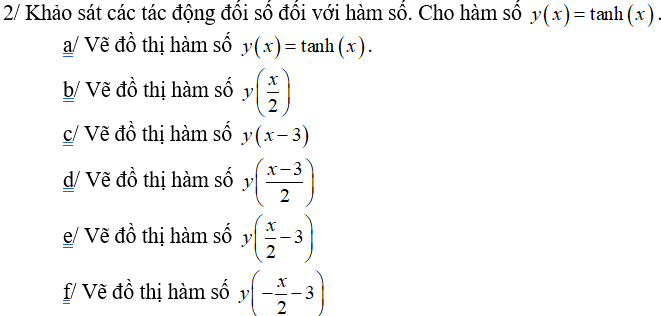

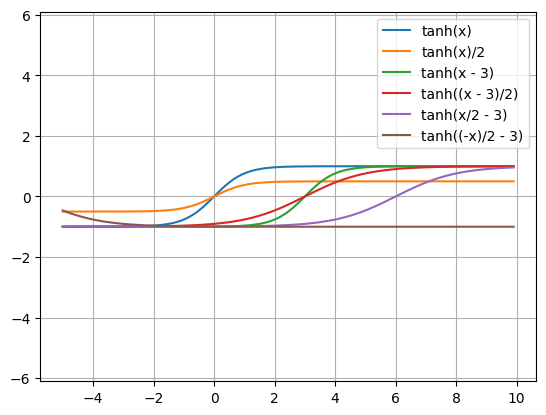

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

x = np.arange(-5, 10, .1)

plt.figure()
plt.axis('equal')
plt.plot(x, tanh(x), label='tanh(x)')
plt.plot(x, tanh(x)/2, label='tanh(x)/2')
plt.plot(x, tanh(x-3), label='tanh(x - 3)')
plt.plot(x, tanh((x-3)/2), label='tanh((x - 3)/2)')
plt.plot(x, tanh(x/2-3), label='tanh(x/2 - 3)')
plt.plot(x, tanh((-x)/2 -3), label='tanh((-x)/2 - 3)')



plt.legend()
plt.grid(True)
plt.show()

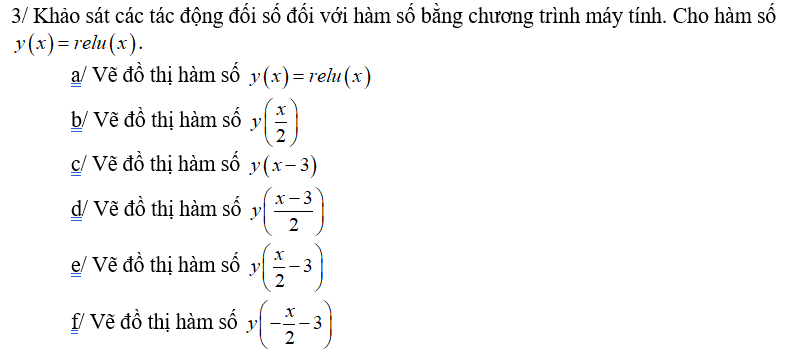

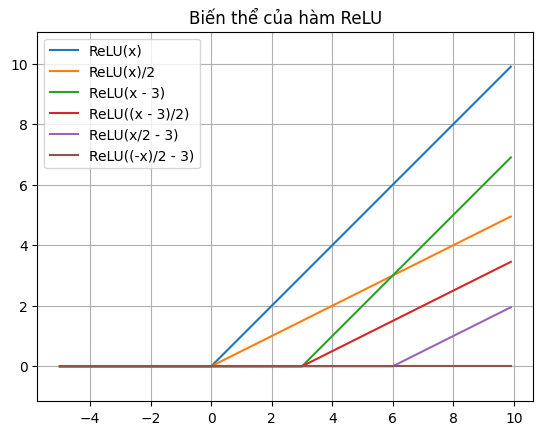

In [11]:
def y(x):
    return np.maximum(0, x)

plt.figure()
plt.axis('equal')

plt.plot(x, y(x), label='ReLU(x)')
plt.plot(x, y(x)/2, label='ReLU(x)/2')
plt.plot(x, y(x-3), label='ReLU(x - 3)')
plt.plot(x, y((x-3)/2), label='ReLU((x - 3)/2)')
plt.plot(x, y(x/2 - 3), label='ReLU(x/2 - 3)')
plt.plot(x, y((-x)/2 - 3), label='ReLU((-x)/2 - 3)')

plt.legend()
plt.title("Biến thể của hàm ReLU")
plt.grid(True)
plt.show()

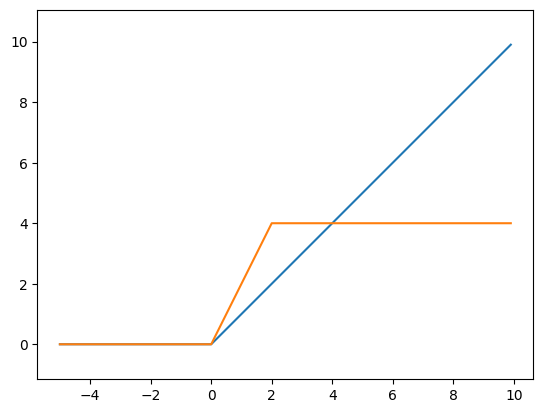

In [18]:
def ReLU(xx):
    x = xx*1.0
    id = np.where(x<0)
    x[id] = x[id]*0
    return x

x = np.arange(-5, 10, .1)
plt.figure()
plt.axis('equal')
plt.plot(x, ReLU(x), label='ReLU(x)')

a=5*(np.random.random()-.5)
b=5*(np.random.random()-.5)
c=5*(np.random.random()-.5)
d=5*(np.random.random()-.5)

f = ReLU(2*x) - ReLU(2*(x-2))
plt.plot(x,f)


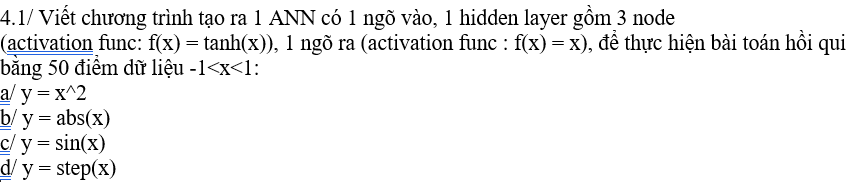

In [43]:

class myann:
    def __init__(self, inum, hidnum, onum):
        self.w1 = np.random.random((hidnum, inum + 1)) - .5
        self.w2 = np.random.random((onum, hidnum + 1)) - .5

    def feedforward(self, X):
        x1 =np.hstack((X, np.array([1])))
        self.x1 = x1
        a1 = self.w1 @ x1
        z1 = tanh(a1)

        z1 = np.hstack((z1, np.array([1])))
        a2 = self.w2 @ z1
        self.z1 = z1
        z2 = (a2)
        return z2
    
    def train(self, X, t, epoch):
        lr =0.2
        for _ in range(epoch):
            for i in range(X.shape[0]):
                input = X[i]
                y = self.feedforward(input)
                D2 = y - t[i]
                GD2 = (np.array([D2])).T @ (np.array([self.z1]))
                self.w2 =self.w2 - lr*GD2

                D1_temp = D2 @ self.w2
                D1 = D1_temp[0 : -1] * (1 - self.z1[0 : -1]**2)
                GD1 = (np.array([D1])).T @ (np.array([self.x1]))
                self.w1 = self.w1 - lr*GD1


ann = myann(2,3,1)
out = ann.feedforward(np.array([3,2]))
print('out',out)

ann.train(np.array([[3,2]]), np.array([-2]),100)
out = ann.feedforward(np.array([3,2]))
print('out',out)



        

out [0.39700325]
out [-2.]


### BTVN: 2 ngõ vào, 1 hidden 4 node (tanh), 2 ngõ ra (sigmoid)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
#|%%--%%| <iyDsjF4oUA|zv8CGLO1i8>

# Khoi tao 1 layer ANN

class ANN:
    def __init__(self, n_inputs, n_hidden, n_outputs):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs

        # khoi tao weights va bias
        self.weights_input_hidden = np.random.rand(n_inputs + 1, n_hidden) # 2x5
        self.weights_hidden_output = np.random.rand(n_hidden + 1, n_outputs) # 5x2
        
        # khoi tao activation function

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.tanh(x) ** 2

    # feedforward
    def feedforward(self, inputs):
        inputs = np.hstack((inputs, 1)) # them bias

        self.hidden_layer_input = np.einsum('ij, i -> j', self.weights_input_hidden, inputs) # 3x4, 1x3 -> 1x4
        self.hidden_layer_input_tanh = self.tanh(self.hidden_layer_input) # 1x4
        self.hidden_layer_input_tanh = np.hstack((self.hidden_layer_input_tanh, 1)) # them bias 1x5

        self.output_layer_input = np.einsum('ij, i -> j', self.weights_hidden_output, self.hidden_layer_input_tanh) # 5x2, 1x5 -> 1x2
        #self.output = self.sigmoid(self.output_layer_input)
        self.output = self.output_layer_input # neu sigma(x) = x
        return self.output


ann = ANN(2, 4, 2)
#    print(ann.weights_input_hidden)
#    print(ann.weights_hidden_output)
input = np.array([1, 0])
output = ann.feedforward(input)
print(output)

#|%%--%%| <zv8CGLO1i8|UxIU617L5N>

a = np.array([[1, 1, 2], [1, 2, 0]])
b = np.array([1, 1, 1])
print(a)
print(b)
d = np.dot(a, b.T) # 2x3 X 3x1
c = np.einsum('ij, j -> i', a, b) 
print(c)
print(d)


#|%%--%%| <UxIU617L5N|nWRG7xfYwB>

# Train
ann = ANN(2, 4, 2)

def train(self, inputs, targets, epochs, learning_rate):
    for epoch in range(epochs):
        for i in range(len(inputs)):
            input_i = inputs[i]
            target_i = targets[i]
            
            output = ann.feedforward(input_i)

            # tinh toan sai so
            error = target_i - output

            # backpropagation
            d_output = error * self.sigmoid_derivative(self.output)
            error_hidden_layer = d_output.dot(self.weights_hidden_output.T)
            d_hidden_layer = error_hidden_layer * self.tanh_derivative(self.hidden_layer_input_tanh)

            # cap nhat weights
            self.weights_hidden_output += self.hidden_layer_input_tanh.T.dot(d_output) * learning_rate
            self.weights_input_hidden += np.hstack((input, 1)).T.dot(d_hidden_layer) * learning_rate
        


[2.52189538 2.6362111 ]
[[1 1 2]
 [1 2 0]]
[1 1 1]
[4 3]
[4 3]
